In [1]:
GPUAcc = False
try:
    import cupy as xp
    GPUAcc = True
    print("Using GPU Acceleration")
except:
    import numpy as xp
import matplotlib.pyplot as plt
from Metropolis import Metropolis_Time_Recorded, Metropolis, Metropolis2D
import pickle

Using GPU Acceleration
Using GPU Acceleration


In [2]:
Tfinal = 0.0001
Nspins = 20

Jnonlocal = 2*xp.random.rand(Nspins,Nspins)-1
Jlocal = 10.*xp.ones(Nspins)

Zenergy=1.0

metTime = Metropolis_Time_Recorded(Jnonlocal, Jlocal, Zenergy, Tfinal)
states_record = metTime.run()

In [2]:
Nspins = 8

# Jnonlocal = xp.random.normal(
#                     loc=0.0, scale=1.0, size=(Nspins, Nspins)) #xp.ones((Nspins, Nspins))
# Jnonlocal = (Jnonlocal + Jnonlocal.T)/2
Jlocal = 10.*xp.ones(Nspins)

# Zenergy=1.0e-5

In [3]:
Jnonlocal = xp.array([[-1.46000754,  0.66307027, -0.36324195, -0.89853853,  0.10771147,
        -0.36567651, -0.58853263,  0.16587756],
       [ 0.66307027, -0.96435315, -0.01312276, -0.79007184,  0.30340302,
         0.38625942,  1.19862103,  0.15204514],
       [-0.36324195, -0.01312276, -0.11171844,  1.06908322, -1.24787081,
        -0.63673043,  0.74883775,  0.35162467],
       [-0.89853853, -0.79007184,  1.06908322, -1.66207899, -0.35355957,
        -0.54518182,  0.36818289,  1.05812929],
       [ 0.10771147,  0.30340302, -1.24787081, -0.35355957, -1.5087697 ,
         0.17371169, -0.08017211,  1.51076996],
       [-0.36567651,  0.38625942, -0.63673043, -0.54518182,  0.17371169,
         1.72453836,  0.01690911,  0.35817871],
       [-0.58853263,  1.19862103,  0.74883775,  0.36818289, -0.08017211,
         0.01690911, -0.4166188 , -0.52707744],
       [ 0.16587756,  0.15204514,  0.35162467,  1.05812929,  1.51076996,
         0.35817871, -0.52707744, -0.78813721]])

In [4]:
Tfinal = max(xp.linalg.eigvalsh(Jnonlocal))*0.05
AnnealHigh = max(xp.linalg.eigvalsh(Jnonlocal))*1.5

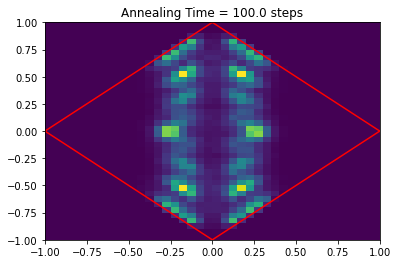

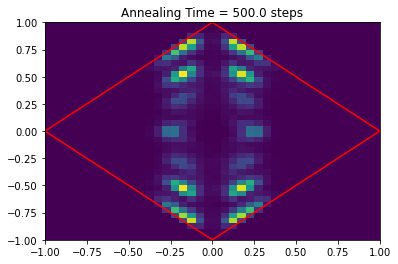

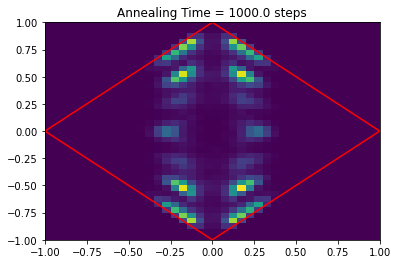

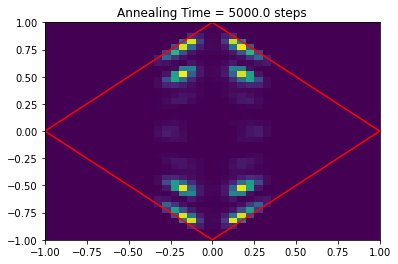

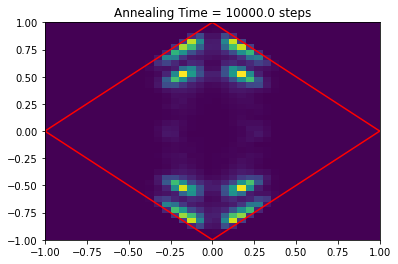

In [8]:
for AnnealT in [10000., 15000., 20000.]:
    met = Metropolis2D(Jnonlocal, Tfinal, steps=int(3*AnnealT), sigma=xp.pi/10, Nspins=Nspins, AnnealT=AnnealT, Nrepl=500, AnnealHigh=AnnealHigh)
    final_state = met.run()
    fig, ax = plt.subplots()
    ax.set_title(f"Annealing Time = {AnnealT} steps")
    met.plot_overlap_distribution(ax=ax)
    plt.show()

In [75]:
Jnonlocal

array([[-1.46000754,  0.66307027, -0.36324195, -0.89853853,  0.10771147,
        -0.36567651, -0.58853263,  0.16587756],
       [ 0.66307027, -0.96435315, -0.01312276, -0.79007184,  0.30340302,
         0.38625942,  1.19862103,  0.15204514],
       [-0.36324195, -0.01312276, -0.11171844,  1.06908322, -1.24787081,
        -0.63673043,  0.74883775,  0.35162467],
       [-0.89853853, -0.79007184,  1.06908322, -1.66207899, -0.35355957,
        -0.54518182,  0.36818289,  1.05812929],
       [ 0.10771147,  0.30340302, -1.24787081, -0.35355957, -1.5087697 ,
         0.17371169, -0.08017211,  1.51076996],
       [-0.36567651,  0.38625942, -0.63673043, -0.54518182,  0.17371169,
         1.72453836,  0.01690911,  0.35817871],
       [-0.58853263,  1.19862103,  0.74883775,  0.36818289, -0.08017211,
         0.01690911, -0.4166188 , -0.52707744],
       [ 0.16587756,  0.15204514,  0.35162467,  1.05812929,  1.51076996,
         0.35817871, -0.52707744, -0.78813721]])

In [ ]:
for AnnealT in [100., 200., 600., 1000., 2000.]:
    Zenergy=0.0
    met = Metropolis(Jnonlocal, Tfinal, steps=int(3*AnnealT), Zenergy=Zenergy, sigma=xp.pi/10, Nspins=Nspins, AnnealT=AnnealT)
    final_state = met.run()
    fig, ax = plt.subplots()
    ax.set_title(f"Annealing Time = {AnnealT} steps")
    met.plot_overlap_distribution(ax=ax)
    plt.show()

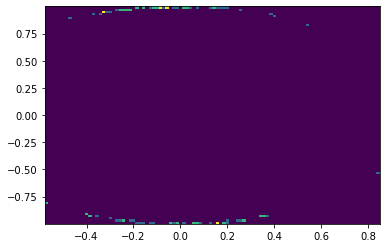

In [59]:
met.plot_single_spin_hist(5)

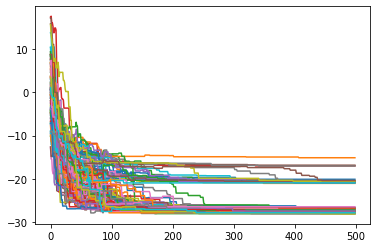

In [48]:
plt.plot(met.energy_record[:,:500].get().T)

In [14]:
xp.argmin(met.energy_record[:,999])

array(85, dtype=int64)

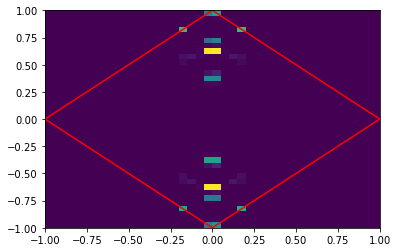

In [29]:
with open("MetropolisRuns/2component/T=1.0e-05.pickle", "rb") as f:
        loadedmet = pickle.load(f)
loadedmet.plot_overlap_distribution()

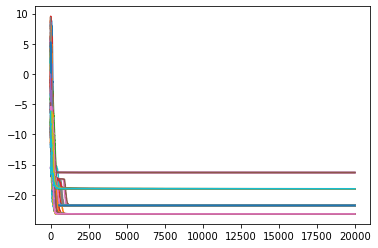

In [30]:
loadedmet.plot_energy_record()

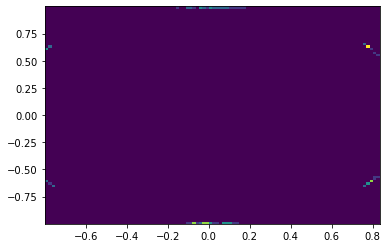

In [26]:
loadedmet.plot_single_spin_hist(2)